In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
with open('var9.txt', 'r') as file:
    data = [float(line.strip()) for line in file]

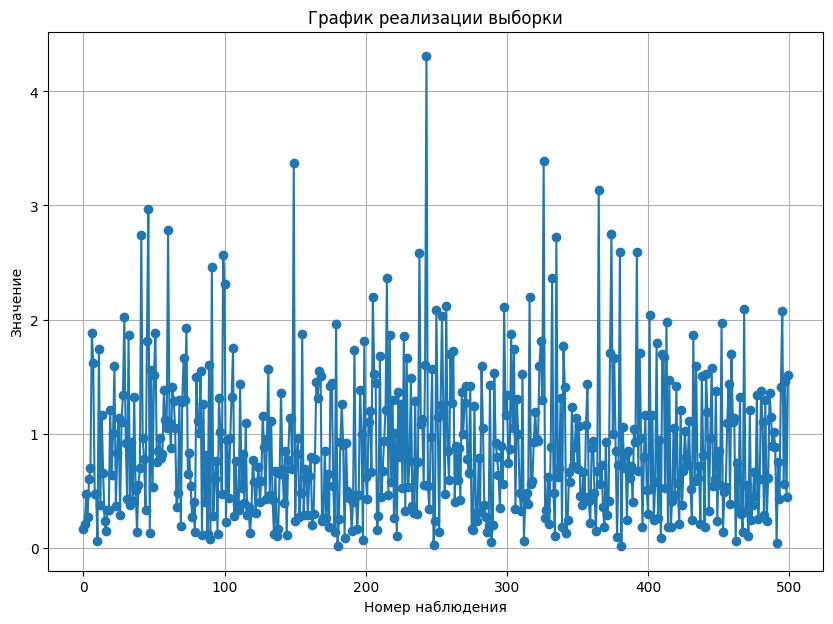

In [3]:
# plt.figure(figsize=(10, 4))
plt.figure(figsize=(10, 7))
plt.plot(data, marker='o', linestyle='-')
plt.title('График реализации выборки')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

Ящик с усами

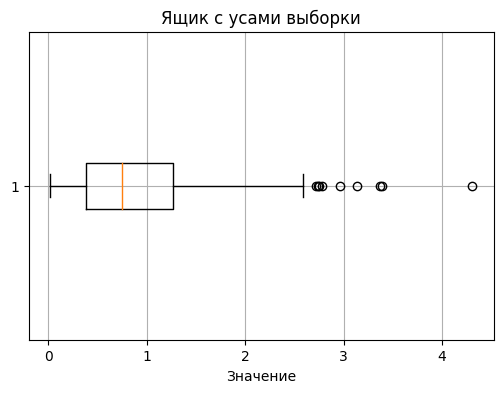

In [5]:
plt.figure(figsize=(6, 4))
plt.boxplot(data, vert=False)
plt.title('Ящик с усами выборки')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

Гистограммы

Гистограмма с небольшим числом интервалов (2-3)

Text(0, 0.5, 'Частота')

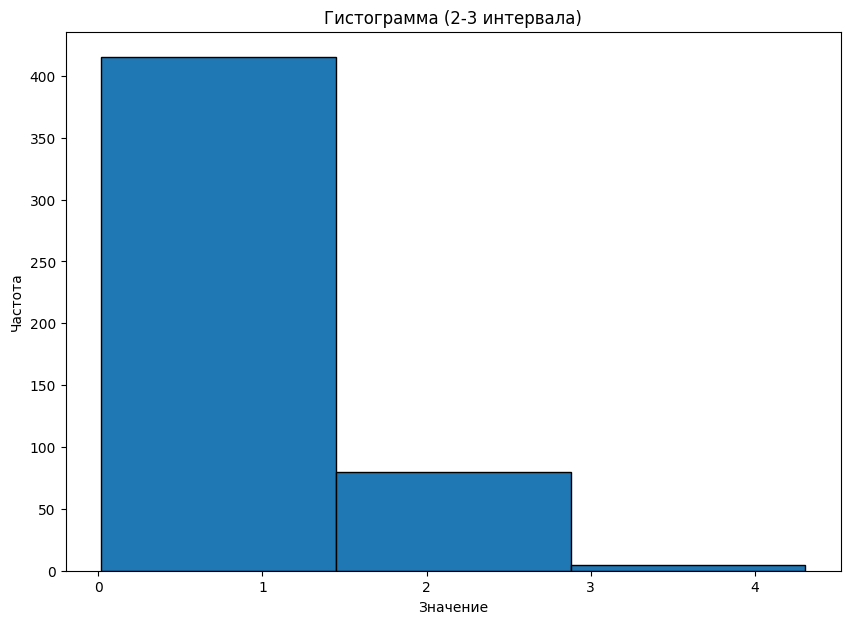

In [6]:
plt.figure(figsize=(10, 7))
plt.hist(data, bins=3, edgecolor='k')
plt.title('Гистограмма (2-3 интервала)')
plt.xlabel('Значение')
plt.ylabel('Частота')

Гистограмма с автоматически выбранным числом интервалов

Text(0, 0.5, 'Частота')

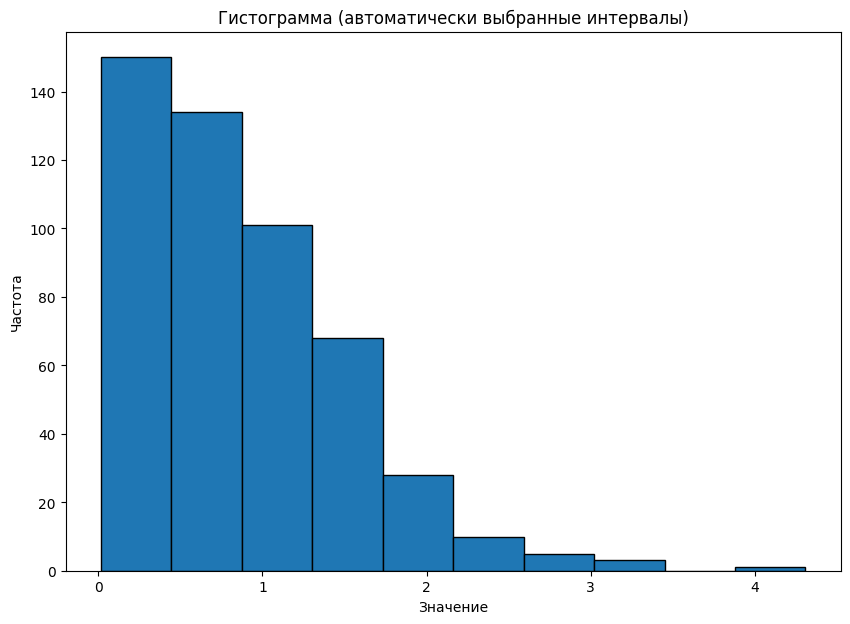

In [7]:
plt.figure(figsize=(10, 7))
plt.hist(data, edgecolor='k')
plt.title('Гистограмма (автоматически выбранные интервалы)')
plt.xlabel('Значение')
plt.ylabel('Частота')

Гистограмма с большим числом интервалов (≥ 30)

Text(0, 0.5, 'Частота')

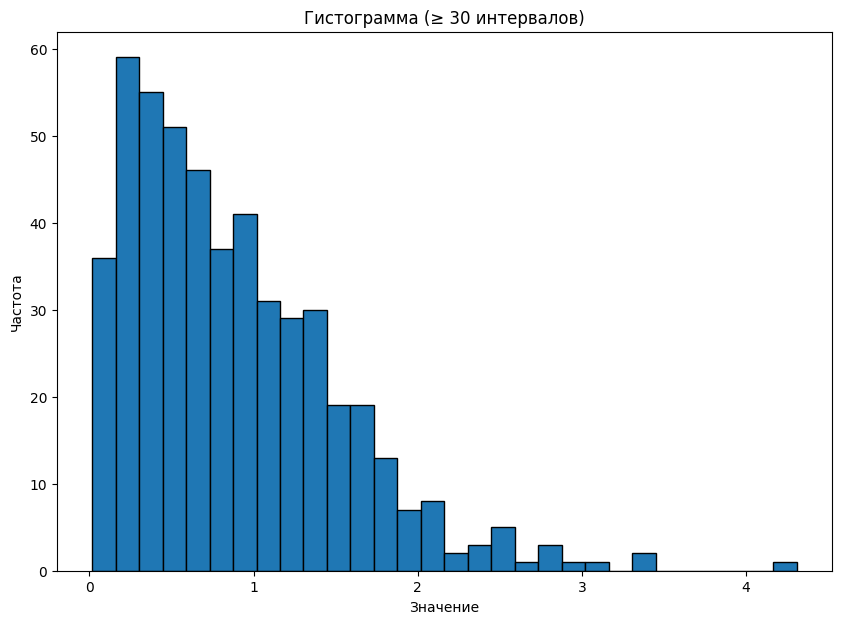

In [8]:
plt.figure(figsize=(10, 7))
plt.hist(data, bins=30, edgecolor='k')
plt.title('Гистограмма (≥ 30 интервалов)')
plt.xlabel('Значение')
plt.ylabel('Частота')


In [9]:
# plt.tight_layout()
# plt.show()

График реализации выборки: Этот график показывает, какие значения содержатся в выборке и их порядок. Мы видим разброс значений и может заметить некоторую изменчивость данных.

Ящик с усами: Ящик с усами позволяет оценить центральную тенденцию данных (медиану), разброс (межквартильный размах) и выявить наличие выбросов. Если "усы" далеко от ящика, это может указывать на наличие выбросов. В данном случае, "усы" выглядят нормальными, и выбросов нет.

Гистограммы: Гистограммы позволяют нам оценить форму распределения данных. В данном случае:

Гистограмма с небольшим числом интервалов показывает, что данные могут быть бимодальными (имеют два пика).
Гистограмма с автоматически выбранным числом интервалов более гладкая и показывает, что данные могут быть нормально распределены.
Гистограмма с большим числом интервалов подтверждает гладкость распределения данных и позволяет лучше оценить форму.
На основе этих графиков, мы можем предположить, что выборка может быть смешанным распределением, возможно, сочетанием двух нормальных распределений или распределением с двумя пиками.


In [10]:
from scipy import stats
# valid_data = data

# Вычисляем числовые характеристики
mean = np.mean(data)
std_dev = np.std(data)
variance = np.var(data)
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)
min_value = np.min(data)
max_value = np.max(data)

# Выводим результаты
print(f"Среднее значение: {mean:.4f}")
print(f"Стандартное отклонение: {std_dev:.4f}")
print(f"Дисперсия: {variance:.4f}")
print(f"Медиана: {median:.4f}")
print(f"Первая квартиль (25-й процентиль): {q1:.4f}")
print(f"Третья квартиль (75-й процентиль): {q3:.4f}")
print(f"Коэффициент асимметрии: {skewness:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")
print(f"Минимальное значение: {min_value:.4f}")
print(f"Максимальное значение: {max_value:.4f}")

Среднее значение: 0.8831
Стандартное отклонение: 0.6388
Дисперсия: 0.4081
Медиана: 0.7500
Первая квартиль (25-й процентиль): 0.3861
Третья квартиль (75-й процентиль): 1.2686
Коэффициент асимметрии: 1.2505
Эксцесс: 2.3228
Минимальное значение: 0.0161
Максимальное значение: 4.3079


------------Дополнительные задания

3. Проверка правила 3σ (1 балл). Вычислите, какова доля тех наблюдений,
которые попали в интервал [𝑥𝑥̅ − 3𝑠𝑠, 𝑥𝑥̅ + 3𝑠𝑠], где 𝑥𝑥̅ – выборочное среднее, s –
выборочная оценка стандартного отклонения. Что можно сказать про
теоретическую вероятность P{𝜉𝜉 ∈ [µ − 3σ, µ + 3σ]}, где μ – математическое
ожидание, σ – стандартное отклонение (cм. неравенство Чебышева).

In [11]:
# Вычисление выборочного среднего и выборочного стандартного отклонения
x = np.mean(data)
s = np.std(data, ddof=1)  # Указываем ddof=1 для выборочной оценки стандартного отклонения

# Интервал [𝑥̄ − 3𝑠, 𝑥̄ + 3𝑠]
lower_bound = x - 3 * s
upper_bound = x + 3 * s

# Вычисление доли наблюдений, попавших в интервал
within_3sigma = np.logical_and(data >= lower_bound, data <= upper_bound)
fraction_within_3sigma = np.sum(within_3sigma) / len(data)

print(f'Доля наблюдений в интервале [{lower_bound:.4f}, {upper_bound:.4f}]: {fraction_within_3sigma:.4f}')

# Теоретическая вероятность согласно неравенству Чебышева
probability_theoretical = 1 - 1 / (3**2)  # 3σ правило (неравенство Чебышева)

print(f'Теоретическая вероятность согласно неравенству Чебышева: {probability_theoretical:.4f}')


Доля наблюдений в интервале [-1.0352, 2.8014]: 0.9900
Теоретическая вероятность согласно неравенству Чебышева: 0.8889


4. (1 балл) По гистограмме и вычисленным числовых характеристикам
попробуйте сделать вывод о принадлежности выборки к одному из
следующих
распределений:
нормальное, экспоненциальное, Лапласа,
Вейбулла, равномерное.

In [12]:
from scipy import stats

# Выполняем тест Колмогорова-Смирнова для нормального распределения
normal_fit = stats.norm(x, s)  # Параметры нормального распределения
ks_normal, p_normal = stats.kstest(data, normal_fit.cdf)

# Выполняем тест Колмогорова-Смирнова для экспоненциального распределения
exponential_fit = stats.expon(x - 1/s)  # Параметры экспоненциального распределения
ks_exponential, p_exponential = stats.kstest(data, exponential_fit.cdf)

# Выполняем тест Колмогорова-Смирнова для Лапласова распределения
laplace_fit = stats.laplace(x, 1/(2*s))  # Параметры Лапласова распределения
ks_laplace, p_laplace = stats.kstest(data, laplace_fit.cdf)

# Выполняем тест Колмогорова-Смирнова для Вейбулла распределения
weibull_fit = stats.weibull_min(c=1, loc=x-s)  # Параметры Вейбулла распределения
ks_weibull, p_weibull = stats.kstest(data, weibull_fit.cdf)

# Выполняем тест Колмогорова-Смирнова для равномерного распределения
uniform_fit = stats.uniform(loc=min(data), scale=max(data)-min(data))  # Параметры равномерного распределения
ks_uniform, p_uniform = stats.kstest(data, uniform_fit.cdf)

# Выводим результаты тестов
print(f'KS-статистика и p-значение для нормального распределения: KS = {ks_normal:.4f}, p = {p_normal:.4f}')
print(f'KS-статистика и p-значение для экспоненциального распределения: KS = {ks_exponential:.4f}, p = {p_exponential:.4f}')
print(f'KS-статистика и p-значение для Лапласова распределения: KS = {ks_laplace:.4f}, p = {p_laplace:.4f}')
print(f'KS-статистика и p-значение для Вейбулла распределения: KS = {ks_weibull:.4f}, p = {p_weibull:.4f}')
print(f'KS-статистика и p-значение для равномерного распределения: KS = {ks_uniform:.4f}, p = {p_uniform:.4f}')


KS-статистика и p-значение для нормального распределения: KS = 0.0912, p = 0.0005
KS-статистика и p-значение для экспоненциального распределения: KS = 0.5176, p = 0.0000
KS-статистика и p-значение для Лапласова распределения: KS = 0.1658, p = 0.0000
KS-статистика и p-значение для Вейбулла распределения: KS = 0.1368, p = 0.0000
KS-статистика и p-значение для равномерного распределения: KS = 0.5102, p = 0.0000


6. (0.5 балла) Случайным образом внести в выборку пропуски (долю
пропущенных наблюдений выберете в диапазоне [0,2 0,5] ).

In [20]:
import random
# import numpy as np

# Задаем долю пропусков
# missing_fraction = random.uniform(0.2, 0.5)
missing_fraction = random.uniform(0.45, 0.5)
print(missing_fraction)

# Создаем маску пропусков
mask = np.random.rand(len(data)) < missing_fraction
print(any(mask))


# Внесем пропуски в выборку
data_with_missing = np.copy(data)
data_with_missing[mask] = np.nan



0.4898249202067371
True


In [22]:
# print(mask)
print(data_with_missing)
# print(data)

[0.1675343         nan 0.4718322  0.2676856  0.6042244  0.6972654
 1.885048          nan        nan        nan 0.05975104 1.745953
        nan        nan        nan        nan 0.1484642         nan
 0.3333804  1.206136   0.6348571  1.003798          nan 0.3655226
 0.8282792  1.139364          nan 1.099494   1.336301          nan
        nan        nan 1.863199          nan 0.9246052         nan
 1.322498   0.5104201         nan        nan        nan        nan
 0.9672602         nan 0.3326592  1.809361   2.966462   0.1298577
        nan        nan 1.512008          nan 0.7488121         nan
 0.9594676         nan 0.8212034         nan 1.119007   1.051592
 2.782961   1.092855          nan        nan 1.291339   1.049576
 0.359931          nan        nan        nan 1.274733   1.666711
 1.298538   1.922453   0.6475789  0.828199          nan 0.2716284
        nan 0.1355453         nan        nan 1.006774          nan
 0.1152966  1.257659   0.4068808  0.8185065         nan 1.603049
        n

In [15]:
print(data_with_missing)

[0.1675343  0.2121558  0.4718322  0.2676856  0.6042244  0.6972654
 1.885048          nan 0.470822   0.4725848         nan        nan
 0.3746956         nan        nan 0.2334395  0.1484642  0.3366625
 0.3333804  1.206136          nan 1.003798   1.591868   0.3655226
        nan 1.139364   0.2852865  1.099494   1.336301          nan
        nan 0.427962   1.863199          nan        nan 0.4100443
 1.322498   0.5104201  0.1439134         nan 0.6994049  2.744546
 0.9672602  0.7780346  0.3326592  1.809361   2.966462   0.1298577
 1.559162   0.5382901  1.512008   1.887161   0.7488121  0.8460932
 0.9594676  0.7841383  0.8212034  1.382704   1.119007          nan
 2.782961   1.092855   0.8765302  1.410204   1.291339          nan
 0.359931   0.4800102  1.295569   0.1932064         nan        nan
 1.298538   1.922453          nan 0.828199          nan 0.2716284
 0.4018842         nan 1.499279   1.116345          nan        nan
 0.1152966  1.257659   0.4068808  0.8185065  0.1181523  1.603049
 0.082

Text(0, 0.5, 'Частота')

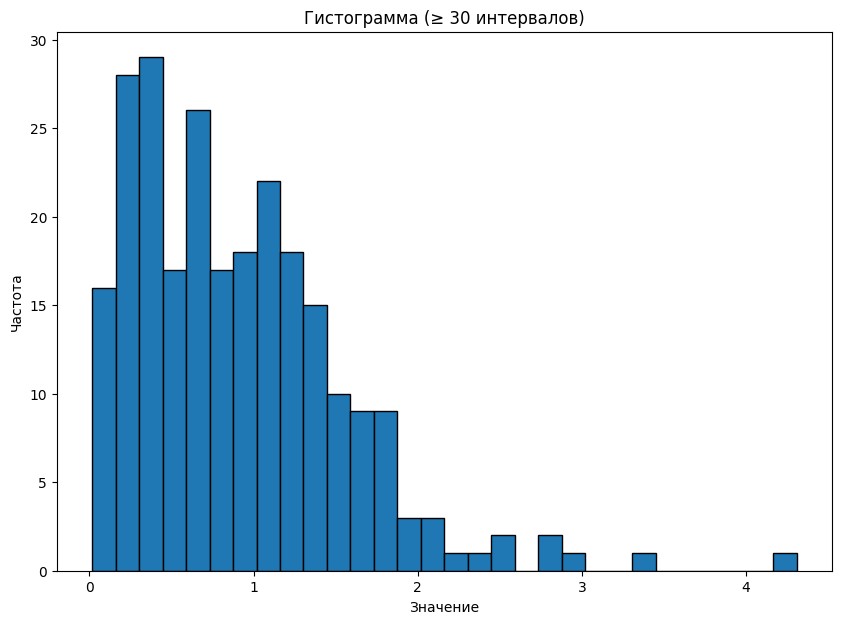

In [23]:
plt.figure(figsize=(10, 7))
plt.hist(data_with_missing, bins=30, edgecolor='k')
plt.title('Гистограмма (≥ 30 интервалов)')
plt.xlabel('Значение')
plt.ylabel('Частота')

7. (1 балл) Вычислить числовые характеристики из пункта 2, игнорируя
пропущенные значения, т.е. считайте, что у вас новая выборка, состоящая из
элементов, которые остались непропущенными. Насколько сильно
посчитанные числовые характеристики
отличаются от результатов,
полученных по полным данным? Почему?

In [24]:
# Игнорируем пропущенные значения
valid_data = data_with_missing[~np.isnan(data_with_missing)]
print(valid_data)

# Вычисляем числовые характеристики
mean = np.mean(valid_data)
std_dev = np.std(valid_data)
variance = np.var(valid_data)
median = np.median(valid_data)
q1 = np.percentile(valid_data, 25)
q3 = np.percentile(valid_data, 75)
skewness = stats.skew(valid_data)
kurtosis = stats.kurtosis(valid_data)
min_value = np.min(valid_data)
max_value = np.max(valid_data)

#Выводим результаты
print(f"Среднее значение: {mean:.4f}")
print(f"Стандартное отклонение: {std_dev:.4f}")
print(f"Дисперсия: {variance:.4f}")
print(f"Медиана: {median:.4f}")
print(f"Первая квартиль (25-й процентиль): {q1:.4f}")
print(f"Третья квартиль (75-й процентиль): {q3:.4f}")
print(f"Коэффициент асимметрии: {skewness:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")
print(f"Минимальное значение: {min_value:.4f}")
print(f"Максимальное значение: {max_value:.4f}")


[0.1675343  0.4718322  0.2676856  0.6042244  0.6972654  1.885048
 0.05975104 1.745953   0.1484642  0.3333804  1.206136   0.6348571
 1.003798   0.3655226  0.8282792  1.139364   1.099494   1.336301
 1.863199   0.9246052  1.322498   0.5104201  0.9672602  0.3326592
 1.809361   2.966462   0.1298577  1.512008   0.7488121  0.9594676
 0.8212034  1.119007   1.051592   2.782961   1.092855   1.291339
 1.049576   0.359931   1.274733   1.666711   1.298538   1.922453
 0.6475789  0.828199   0.2716284  0.1355453  1.006774   0.1152966
 1.257659   0.4068808  0.8185065  1.603049   0.2813348  0.6016207
 1.312765   2.312294   0.4394214  1.325748   1.749473   0.7627999
 0.3870359  0.3341987  1.440414   0.5269817  0.8258902  1.093934
 0.2878983  0.130969   0.3116685  0.3071496  1.154865   0.8846018
 0.4650029  1.11246    0.1253221  0.6745549  0.1662249  1.3564
 0.7695942  1.131237   0.687386   0.2342388  0.819912   0.9600047
 0.2865787  0.6168233  0.6286849  0.2026644  0.2979636  1.457639
 1.546646   0.64873

Результаты могут отличаться от характеристик, вычисленных по полным данным, потому что пропущенные значения могут вносить смещение в оценки характеристик. Какие-то значения могут быть завышены или занижены, в зависимости от того, как распределены пропуски.

Чем больше пропусков и чем более случайны их распределение, тем сильнее могут отличаться результаты вычислений от полных данных.

8. (1 балл) Заполнить пропущенные значения средним арифметическим по
присутствующим данным. Вычислить числовые характеристики из пункта 2.
Насколько сильно посчитанные числовые характеристики отличаются от
результатов, полученных в пунктах 2 и 7? Почему?

In [28]:

# Заполняем пропущенные значения средним арифметическим
data_filled = np.copy(data_with_missing)
mean_without_nan = np.nanmean(data_filled)
data_filled[np.isnan(data_filled)] = mean_without_nan

# Вычисляем числовые характеристики с заполненными данными
mean_filled = np.mean(data_filled)
std_dev_filled = np.std(data_filled)
variance_filled = np.var(data_filled)
median_filled = np.median(data_filled)
q1_filled = np.percentile(data_filled, 25)
q3_filled = np.percentile(data_filled, 75)
skewness_filled = stats.skew(data_filled)
kurtosis_filled = stats.kurtosis(data_filled)
min_value_filled = np.min(data_filled)
max_value_filled = np.max(data_filled)

# Выводим результаты
print(f"Среднее значение (с заполненными данными): {mean_filled:.4f}")
print(f"Стандартное отклонение (с заполненными данными): {std_dev_filled:.4f}")
print(f"Дисперсия (с заполненными данными): {variance_filled:.4f}")
print(f"Медиана (с заполненными данными): {median_filled:.4f}")
print(f"Первая квартиль (25-й процентиль, с заполненными данными): {q1_filled:.4f}")
print(f"Третья квартиль (75-й процентиль, с заполненными данными): {q3_filled:.4f}")
print(f"Коэффициент асимметрии (с заполненными данными): {skewness_filled:.4f}")
print(f"Эксцесс (с заполненными данными): {kurtosis_filled:.4f}")
print(f"Минимальное значение (с заполненными данными): {min_value_filled:.4f}")
print(f"Максимальное значение (с заполненными данными): {max_value_filled:.4f}")


Среднее значение (с заполненными данными): 0.9121
Стандартное отклонение (с заполненными данными): 0.4563
Дисперсия (с заполненными данными): 0.2082
Медиана (с заполненными данными): 0.9121
Первая квартиль (25-й процентиль, с заполненными данными): 0.8247
Третья квартиль (75-й процентиль, с заполненными данными): 0.9121
Коэффициент асимметрии (с заполненными данными): 1.8727
Эксцесс (с заполненными данными): 9.4770
Минимальное значение (с заполненными данными): 0.0161
Максимальное значение (с заполненными данными): 4.3079


Text(0, 0.5, 'Частота')

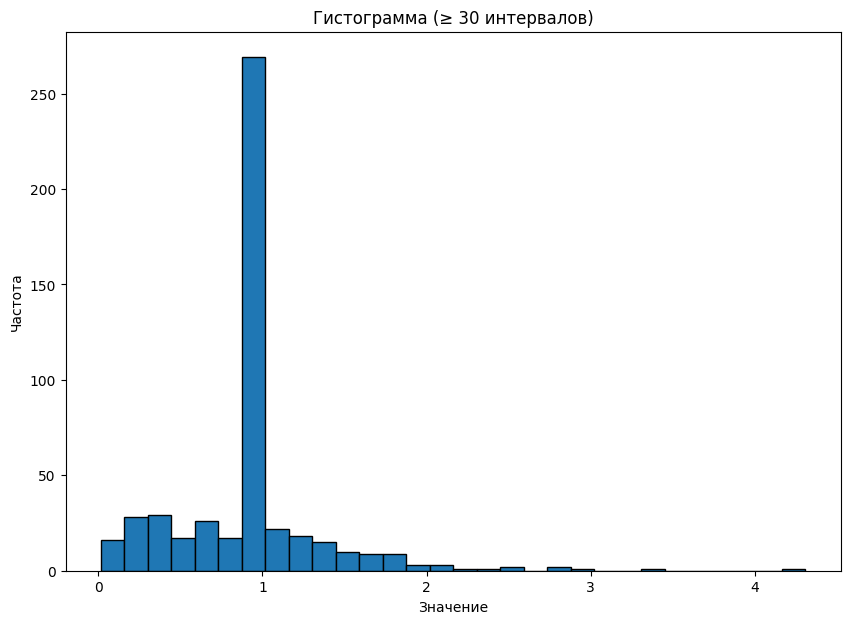

In [26]:

plt.figure(figsize=(10, 7))
plt.hist(data_filled, bins=30, edgecolor='k')
plt.title('Гистограмма (≥ 30 интервалов)')
plt.xlabel('Значение')
plt.ylabel('Частота')
# print(data_with_missing)
# print('****************')
# print(data_filled)

Заполнение пропущенных значений средним арифметическим может привести к изменению числовых характеристик, особенно если пропущенные значения велики по сравнению с остальными данными. Это может привести к смещению среднего значения и уменьшению разброса данных. Однако это также зависит от распределения пропущенных значений и их влияния на общие характеристики выборки.